In [193]:
import os
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

mats = []
labels = []

# Input data files are available in the read-only "../input/" directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename[0:3] == 'nkd':
            labels.append(0)
        else:
            labels.append(1)
        file = os.path.join(dirname, filename)
        img = Image.open(file).convert('LA')
        img.resize((256, 256))
        mat = np.array(img)
        mats.append(mat)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [194]:
x = np.array(mats)
y = np.array(labels)

In [195]:
print("Shape of x: " + str(x.shape))
print("Shape of y: " + str(y.shape))

Shape of x: (128, 512, 512, 2)
Shape of y: (128,)


In [196]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y)
print("Shape of train_x: " + str(train_x.shape))
print("Shape of train_y: " + str(train_y.shape))
print("Shape of test_x: " + str(test_x.shape))
print("Shape of test_y: " + str(test_y.shape))

Shape of train_x: (96, 512, 512, 2)
Shape of train_y: (96,)
Shape of test_x: (32, 512, 512, 2)
Shape of test_y: (32,)


In [197]:
import tensorflow as tf
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
train_y = train_y.reshape((-1, 1))
test_y = test_y.reshape((-1, 1))

In [198]:
schizNet = tf.keras.Sequential()
schizNet.add(tf.keras.layers.Conv2D(16, (3, 3), padding = 'same', input_shape = (512, 512, 2), activation = 'relu'))
schizNet.add(tf.keras.layers.Conv2D(16, (3, 3), padding = 'same', activation = 'relu'))
schizNet.add(tf.keras.layers.MaxPool2D((2, 2), padding = 'same'))
schizNet.add(tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
schizNet.add(tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
schizNet.add(tf.keras.layers.MaxPool2D((2, 2), padding = 'same'))
schizNet.add(tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
schizNet.add(tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
schizNet.add(tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
schizNet.add(tf.keras.layers.MaxPool2D((2, 2), padding = 'same'))
schizNet.add(tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
schizNet.add(tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
schizNet.add(tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
schizNet.add(tf.keras.layers.MaxPool2D((2, 2), padding = 'same'))
schizNet.add(tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
schizNet.add(tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
schizNet.add(tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
schizNet.add(tf.keras.layers.MaxPool2D((2, 2), padding = 'same'))
schizNet.add(tf.keras.layers.Flatten())
schizNet.add(tf.keras.layers.Dense(4096, activation = 'relu'))
#schizNet.add(tf.keras.layers.Dropout(0.5))
schizNet.add(tf.keras.layers.Dense(2048, activation = 'relu'))
#schizNet.add(tf.keras.layers.Dropout(0.5))
schizNet.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
print(schizNet.summary())

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_207 (Conv2D)          (None, 512, 512, 16)      304       
_________________________________________________________________
conv2d_208 (Conv2D)          (None, 512, 512, 16)      2320      
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 256, 256, 16)      0         
_________________________________________________________________
conv2d_209 (Conv2D)          (None, 256, 256, 32)      4640      
_________________________________________________________________
conv2d_210 (Conv2D)          (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_211 (Conv2D)          (None, 128, 128, 64)    

In [199]:
schizNet.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(lr = 0.0001), metrics = ["accuracy"])

In [200]:
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [201]:
train = schizNet.fit(train_x, train_y, epochs = 100, validation_data = (test_x, test_y), callbacks = [mc])

Epoch 1/100
3/3 [==============================] - 7s 2s/step - loss: 1.4247 - accuracy: 0.5664 - val_loss: 1.0169 - val_accuracy: 0.5938

Epoch 00001: val_accuracy improved from -inf to 0.59375, saving model to best_model.h5
Epoch 2/100
3/3 [==============================] - 5s 2s/step - loss: 0.8769 - accuracy: 0.5768 - val_loss: 0.7554 - val_accuracy: 0.4062

Epoch 00002: val_accuracy did not improve from 0.59375
Epoch 3/100
3/3 [==============================] - 5s 2s/step - loss: 0.7218 - accuracy: 0.4701 - val_loss: 0.6774 - val_accuracy: 0.5938

Epoch 00003: val_accuracy did not improve from 0.59375
Epoch 4/100
3/3 [==============================] - 5s 2s/step - loss: 0.6987 - accuracy: 0.5143 - val_loss: 0.6754 - val_accuracy: 0.5938

Epoch 00004: val_accuracy did not improve from 0.59375
Epoch 5/100
3/3 [==============================] - 5s 2s/step - loss: 0.7048 - accuracy: 0.5182 - val_loss: 0.6761 - val_accuracy: 0.5938

Epoch 00005: val_accuracy did not improve from 0.5937

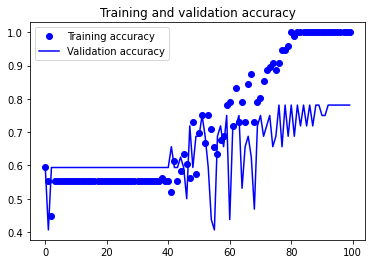

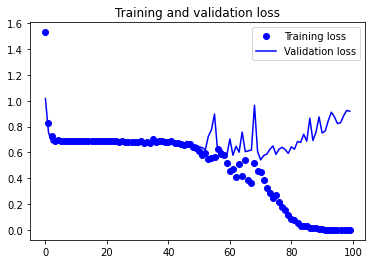

In [202]:
accuracy = train.history["accuracy"]
validation_accuracy = train.history["val_accuracy"]
loss = train.history["loss"]
validation_loss = train.history["val_loss"]
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, "bo", label = "Training accuracy")
plt.plot(epochs, validation_accuracy, "b", label = "Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, validation_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()